# Gaussian Mixture and the EM Algorithm

## Model Specification

We will just describe a Gaussian Mixture of two components here: multiple components is similar. Suppose the generation of data $Y$ follows a mixture of two Gaussian distributions
\begin{align}
y_n = (1-z_n)N(\mu_0, \sigma_0^2)+z_nN(\mu_1, \sigma_1^2),\;\;n=1,\dots, N,
\end{align}
where $z_n\in\{0,1\}$ with $P(z_n=1)=\pi$. Thus the parameter space is $\Theta=\{\mu_0, \sigma_0, \mu_1, \sigma_1, \pi\}$. 

The task at hand is to estimate $\Theta$ by maximum likelihood estimation. The log likelihood of the $N$ training samples is given by
\begin{align}
l(\Theta; Y_{1:N}) = \sum_{n=1}^N\log[(1-\pi)\phi_{\theta_0}(y_n)+\pi\phi_{\theta_1}(y_n)],
\end{align}
where $\theta=\{\mu, \sigma\}$. Directly optimizing the above is challenging numerically, but doing that for the 'full likelihood' is straightforward:
\begin{align}
l(\Theta; Y_{1:N}, Z_{1:N}) = \sum_{n=1}^N\log[(1-z_n)\phi_{\theta_0}(y_n)+z_n\phi_{\theta_1}(y_n)] + \sum_{n=1}^N\log[(1-z_n)\log(1-\pi)+z_n\log(\pi)]. 
\end{align}
But $z_n$ are hidden or latent variables and thus not observed. We thus proceed in an iterative fashion, substituting $z_n$ above with the so-called **responsibilities**
\begin{align}
\gamma_n(\Theta) = E(z_n|\Theta, Y_{1:N}) = P(z_n|\Theta, Y_{1:N}). 
\end{align}
Formally, the Expectation-Maximization algorithm for Gaussian Mixture model is given by 

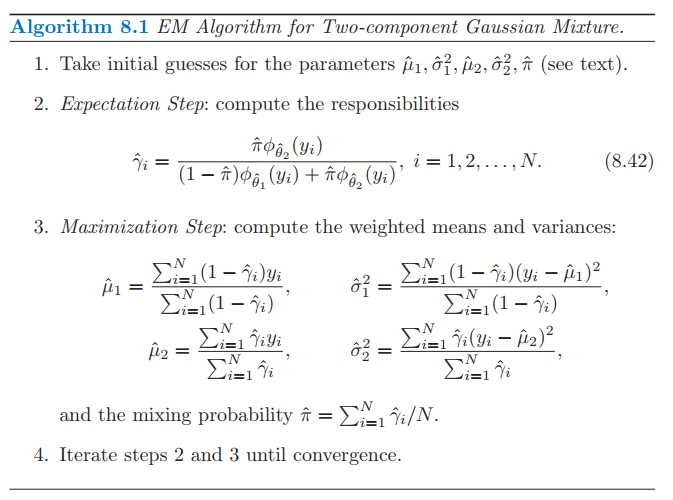


### Variants and Generalizations

To maximize log likelihood $l(Y; \Theta)$, the general EM algorithm, or **Baum-Welch Algorithm** is given by

1. Start with initial guess for the parameters $\hat\Theta^{(0)}$
2. *Expectation Step*: at the $j$-th step, given the latest estimate $\hat\Theta^{(j)}$, compute
\begin{align}
f(\Theta, \hat\Theta^{(j)})=E(l(Y,Z;\Theta)|Y, \hat\Theta^{(j)}).
\end{align}
More explicitly, the expectation is taken under the probability measure of $P(Z|Y,  \hat\Theta^{(j)})$, the posterior probability of $Z$ given $\hat\Theta^{(j)}$.
3. *Maximization Step*: determine the new estimate $\hat\Theta^{(j+1)}$ as the maximization of $f(\Theta, \hat\Theta^{(j)})$ over $\Theta$.
4. Iterate steps 2. and 3. until convergence.

It may not be intuitive why we need to take expectation for and later maximize $f(\Theta, \hat\Theta^{(j)})$ w.r.t. $\Theta$. To see that, note that the log likelihood we want to seek maximization for can be rewritten as
\begin{align}
l(Y|\Theta) = \log P(Y|\Theta) = \log P(Y, Z|\Theta) - \log P(Z|Y, \Theta).
\end{align}
At any point given a $\hat\Theta^{(j)}$, if one takes expectation w.r.t. the probability distribution of $P(Z|Y, \Theta^{(j)})$:
\begin{align}
l(Y|\Theta) &= \int[\log P(Y, Z|\Theta)]P(Z|Y, \Theta^{(j)})dZ - \int[\log P(Z|Y, \Theta)]P(Z|Y, \Theta^{(j)})dZ\\
&:= f(\Theta, \hat\Theta^{(j)}) - g(\Theta, \hat\Theta^{(j)}).
\end{align}
And here is where $f(\Theta, \hat\Theta^{(j)})$ comes from. By the M-step, $\hat\Theta^{(j+1)}$ should satisfy $f(\hat\Theta^{(j+1)}, \hat\Theta^{(j)})\geq f(\hat\Theta^{(j)}, \hat\Theta^{(j)})$. Thus
\begin{align}
l(Y|\hat\Theta^{(j+1)})-l(Y|\hat\Theta^{(j)})\\ &= (f(\hat\Theta^{(j+1)}, \hat\Theta^{(j)})-f(\hat\Theta^{(j)}, \hat\Theta^{(j)})) - (g(\hat\Theta^{(j+1)}, \hat\Theta^{(j)})-g(\Theta^{(j)}, \hat\Theta^{(j)})) \\
&\geq f(\hat\Theta^{(j+1)}, \hat\Theta^{(j)})-f(\hat\Theta^{(j)}, \hat\Theta^{(j)})\\
&\geq 0.
\end{align}
Therefore, the log likelihood is indeed increasing as $j$ progress, and we have proved EM algorithm converges, at least to a local minimum. The fact that $(g(\hat\Theta^{(j+1)}, \hat\Theta^{(j)})-g(\hat\Theta^{(j)}, \hat\Theta^{(j)}))\leq 0$ is due to Jensen Inequality. 

Several extra observations:
- From the above one can even realize that the M-step can actually be relaxed to just increase $f(\Theta, \hat\Theta^{(j)})$, rather than achieving the maximum. Such procedures are called **GEM (generalized EM)**.
- The EM procedure can be viewed as an **alternate ascent** algorithm. Consider the function 
\begin{align}
F(\Theta, \tilde P) = E_{\tilde P}[l(Y, Z; \Theta)] - E_{\tilde P}[\log \tilde P(Z)].
\end{align}
It can be shown that for any given $\Theta$ fixed, $F$ is a lower bound to $l(Y|\Theta)$:
\begin{align}
l(Y|\Theta) &= \log P(Y|\Theta) \\
&= \log\int P(Y,Z|\Theta)dZ \\
&= \log\int \frac{P(Y,Z|\Theta)}{\tilde P(Z)}\tilde P(Z)dZ \\
&\geq \int[\log P(Y, Z|\Theta)]\tilde P(Z)dZ - \int[\log \tilde P(Z)]\tilde P(Z)dZ \\
&= F(\Theta, \tilde P).
\end{align}
In the above, the inequality is due to Jensen's inequality, and it is an equality when $\tilde P(Z)\approx P(Y, Z|\Theta)$, and thus the optimum of $\tilde P(Z)$ is $P(Z|Y, \Theta)$ since it is a probability distribution.

Thus the E-step can be viewed as just taking expectation with a probability distribution under a $\tilde P=P(Z|Y, \hat\Theta^{(j)})$ that maximizes a lower bound of the objective log likelihood given $\Theta$ fixed. Then the M-step is just maximizing w.r.t. $\Theta$ given $\tilde P$ fixed (note that we are maximizing over $f$ and $g$ happens to be optimized when $\Theta=\hat\Theta^{(j)}$). Going uphill for the lower bound will guide the search for $\Theta$ uphill as well, as visualized in the graph below.

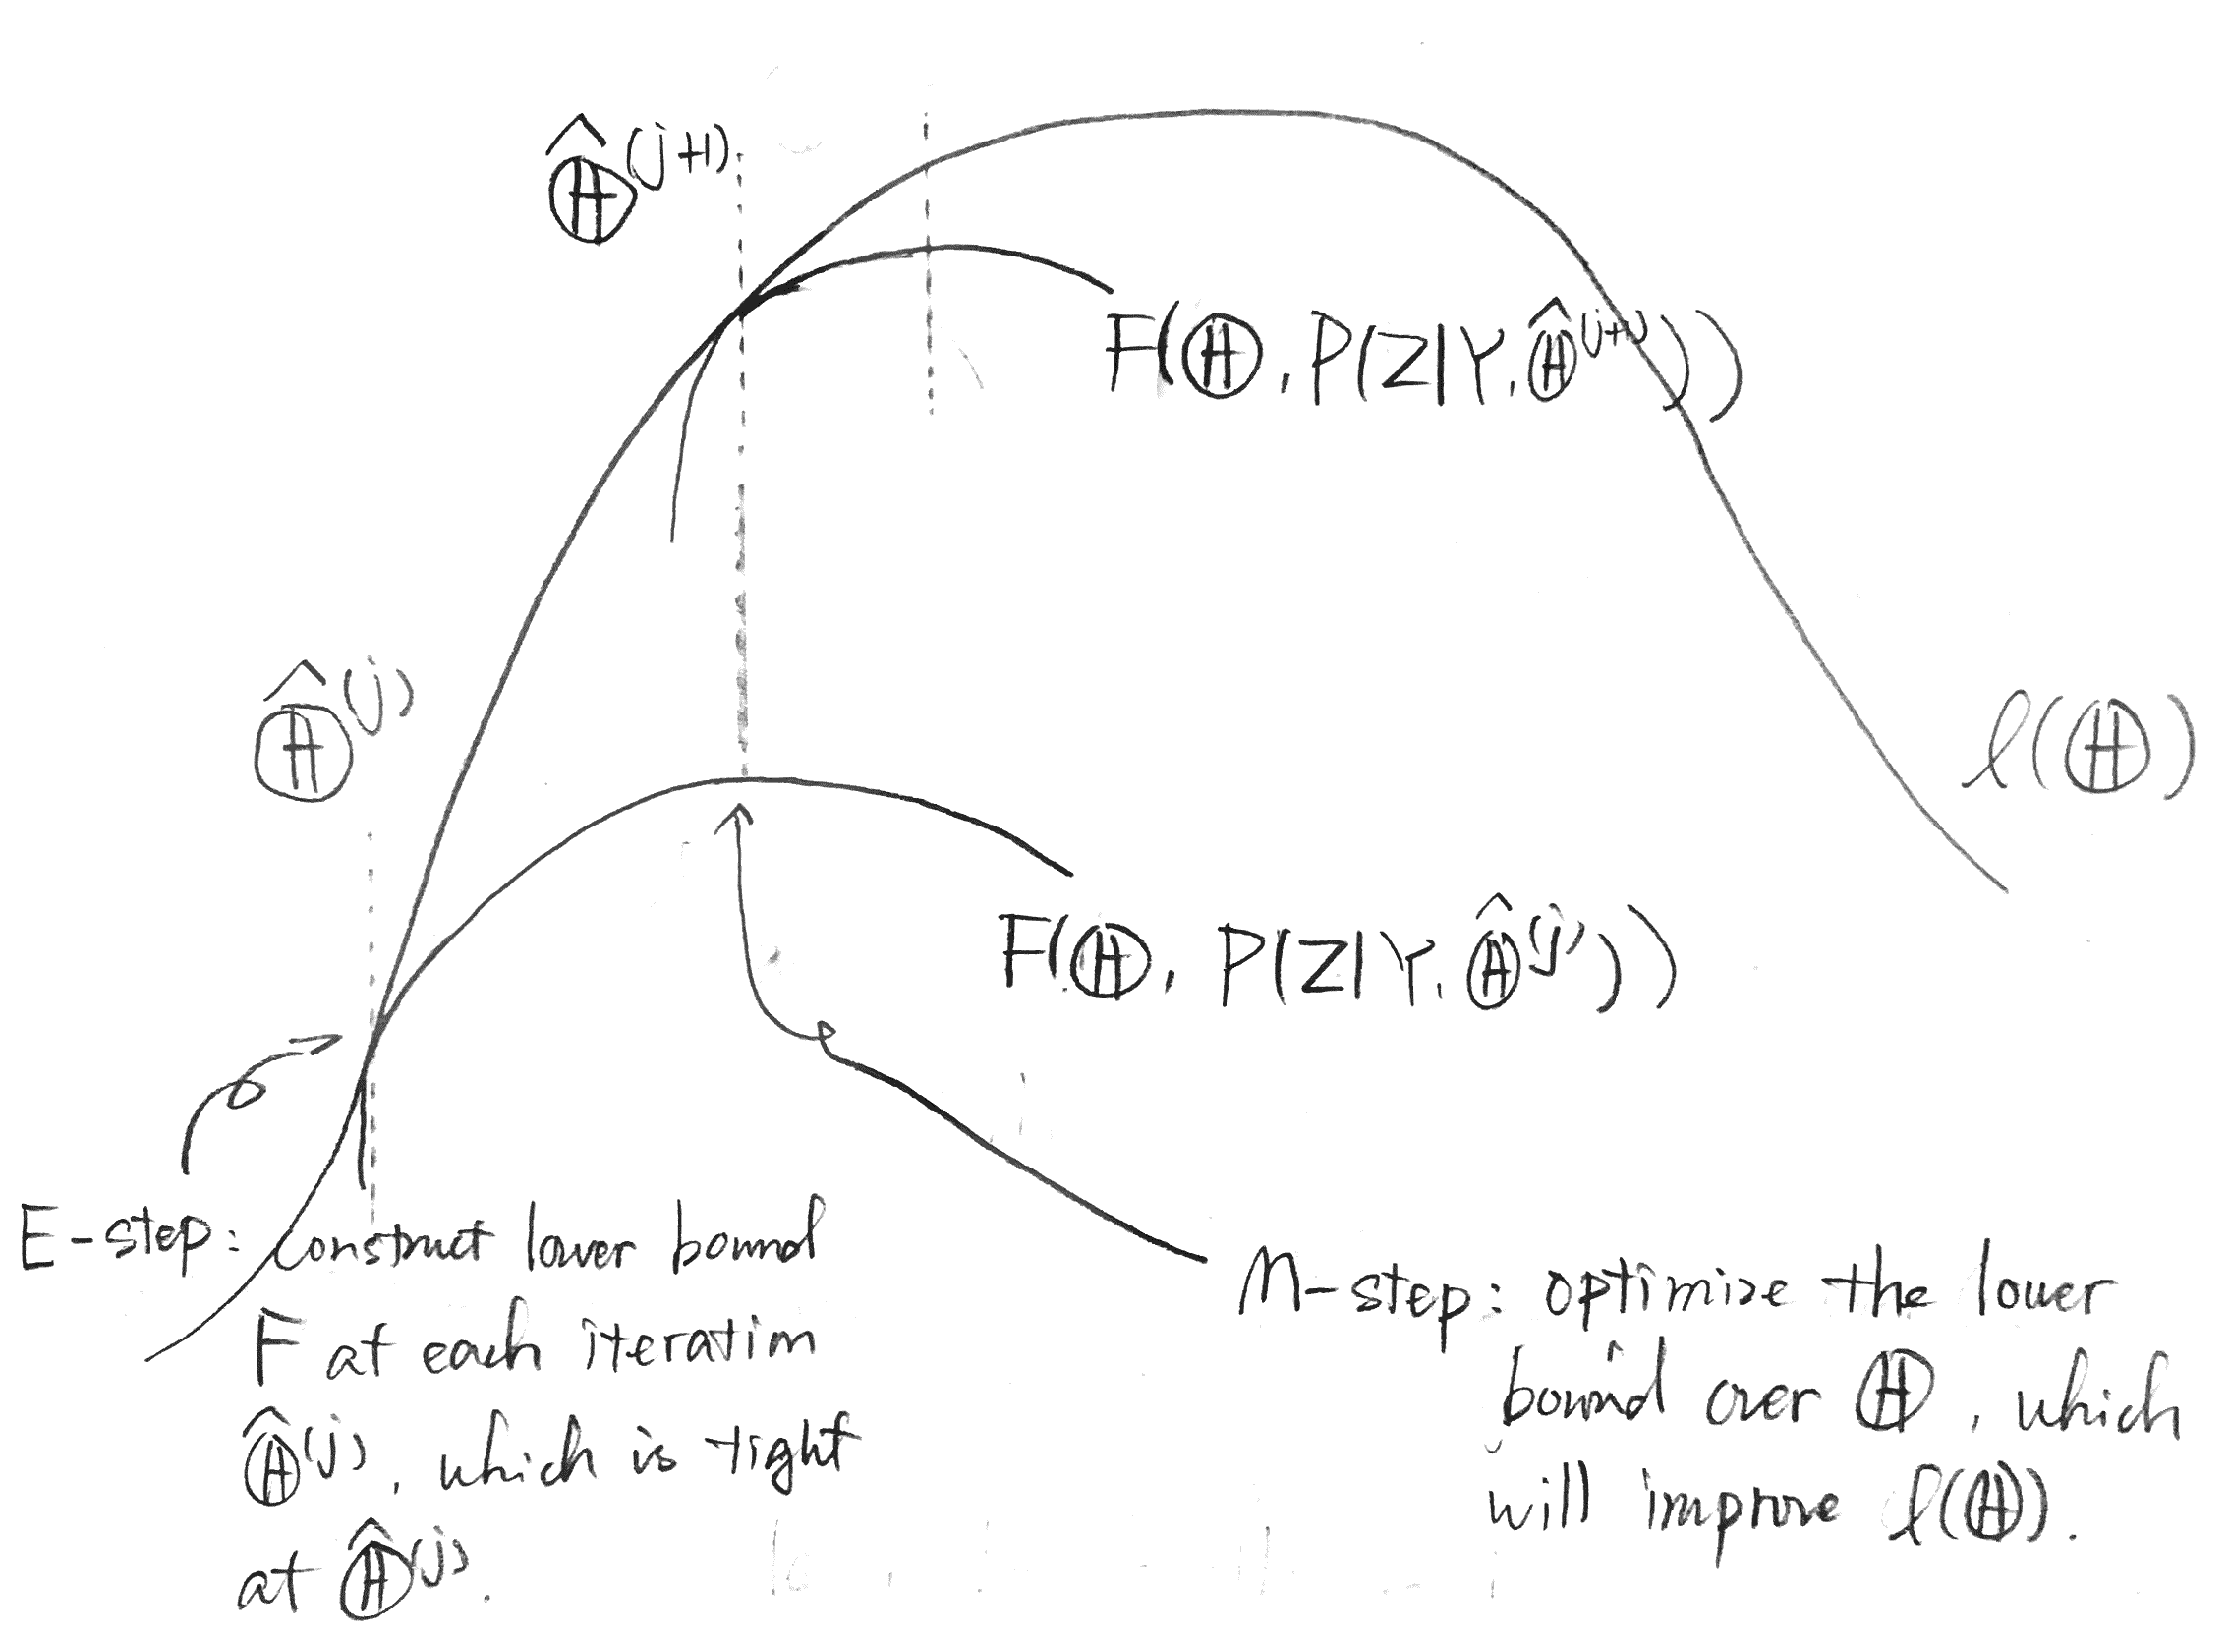

## Theoretical Properties

### Advantages 

- EM has the intuitive appeal whereby unknown variables are educatedly guessed.

### Disadvantages

- Like the [K-Means](kmeans.ipynb), EM may only converges to local optimums, and is very sensitive to initial condition

### Relation to Other Models

- The Lloyd algorithm of [K-means](kmeans.ipynb) can be viewed as a version of EM algorithm as well: whereas assigning each observation by soft probability or responsibility as in Gaussian mixture, it is doing the hard assignment of clusters. In fact, there is a precise correspondence: if we assume each cluster is Gaussian with sphere covariance
- EM algorithm is also naturally related to Gibbs sampler, in that conditional posterior is involved.
  - EM is a method for MLE, and in the M-step seeks to maximize the log likelihood under the posterior conditional
  - Gibbs sampler, as a sampler to the posterior distribution (approximately), seeks to just sample from the likelihood.

## Empirical Performance

### Advantages and Disadvantages

## Implementation Details and Practical Tricks

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, covariance_type='full', tol=1e-3, max_iter=100, n_init=10, init_params='kmeans')

# train the model
gm.fit(X)

# assign classed to new observations 
gm.predict(X_new)

# compute class probabilities
gm.predict_proba()

# The Gaussian mixture is a generative model, i.e. a model about distribution of X. So you can also use it as such
X_gen, y_gen = gm.sample(10)

# To compute the log of probability density function
gm.score_samples(X)

**Some commonly used inputs**:

- **`n_components`** int, defaults to 1. The number of mixture components.

- **`covariance_type`** `{‘full’ (default), ‘tied’, ‘diag’, ‘spherical’}`. String describing the type of covariance parameters to use. Must be one of:

    - `‘full’`: each component has its own general covariance matrix

    - `‘tied’`: all components share the same general covariance matrix

    - `‘diag’`: each component has its own diagonal covariance matrix

    - `‘spherical’`: each component has its own single variance

- **`tol`** float, defaults to 1e-3. The convergence threshold. EM iterations will stop when the lower bound average gain is below this threshold.

- **`max_iter`** int, defaults to 100. The number of EM iterations to perform.

- **`n_init`** int, defaults to 1. The number of initializations to perform. The best results are kept. This is similar to `Kmeans`.

- **`init_params`** `{‘kmeans’, ‘random’}`, defaults to `‘kmeans’`. The method used to initialize the weights, the means and the precisions. Must be one of:

    - `'kmeans'`: responsibilities are initialized using kmeans.
    - `'random'`: responsibilities are initialized randomly.

**Some commonly used attributes**:

- **`weights_`** array-like, shape `(n_components,)` The weights of each mixture components.

- **`means_`** array-like, shape `(n_components, n_features)` The mean of each mixture component.

- **`covariances_`** array-like The covariance of each mixture component. The shape depends on `covariance_type` in the input.

- **`converged_`** to check whether the the EM algorithm converged

- **`n_iter_`** look at how many iteration it took

### Choosing the number of mixtures

With [K-Means](Kmeans.ipynb), you could use the inertia or the silhouette score to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes. Instead, you can try to find the model that minimizes a theoretical information criterion, such as AIC and BIC. It is supported by `sklearn`.

In [ ]:
gm.bic(X)
gm.aic(X)

Another option is to perform Bayesian inference on the number of clusters. You can use the
`BayesianGaussianMixture` class, which is capable of giving weights equal (or close) to zero to
unnecessary clusters. Set the number of clusters `n_components` to a value that you have good
reason to believe is greater than the optimal number of clusters (this assumes some minimal
knowledge about the problem at hand), and the algorithm will eliminate the unnecessary clusters
automatically. (This is from < Hands-on> but did not read the maths underpinning in much detail)

## Use Cases

**Anomaly Detection**

Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a
low-density region can be considered an anomaly.

## Results Interpretation, Metrics and Visualization

You can try to produce a graph like this: the following is a graph of Gaussian mixture as applied to outlier detection.

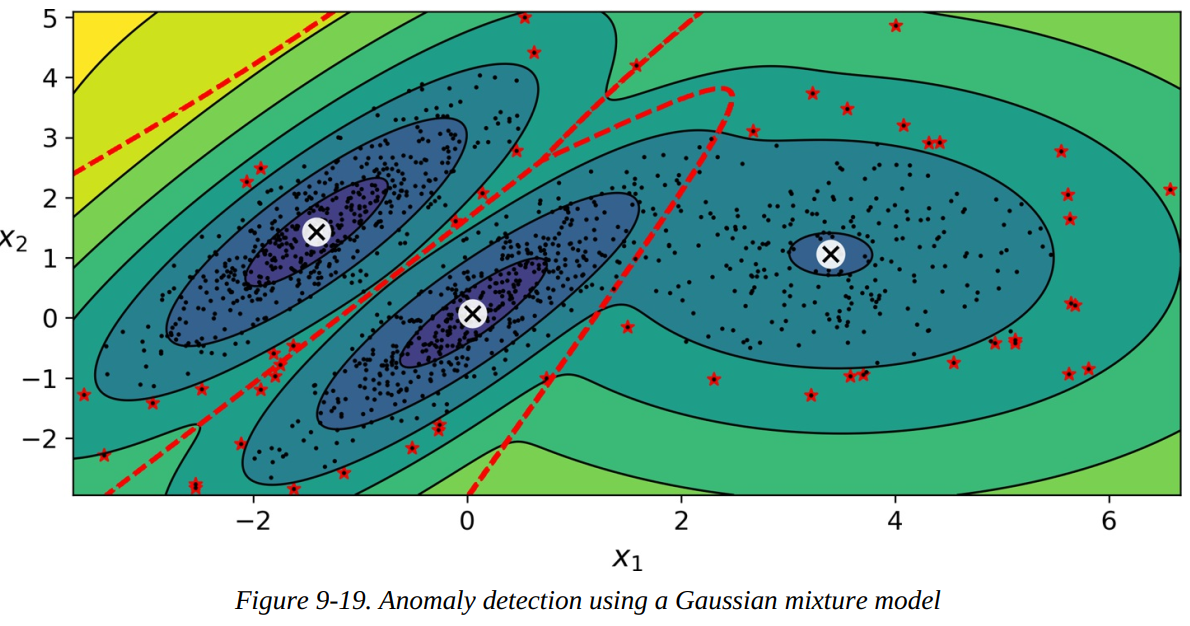

## References 
- ESL, Section 8.5
- Andrew Ng's Machine Learning Course 2011 (although ESL derivation is better and subsumes what is here)
- < Hands-on Machine Learning >, Chapter 9.

### Further Reading

- < Hands-on Machine Learning >, Chapter 9, the part about Bayesian Gaussian Mixture.

## Misc.